## Neustar data

S3 bucket: tvsquared-userdata-dsusa/tv2ds/neustar/

Objective: explore sample and get first insights

Questions to be answered: 
- what did we get? variables, sample size
- do we need more variables?
- what's populated?
- look at gender and age lenses
- looking at other HH information/variables
- having a look at the segments

Data frames created:
- df: original data set read from S3 bucket stored data (Total rows: 1M)
- bad_df: From df - Data with rows that have more than 2 devices (MAIDs). The rest of the data is in **good_df** (Total records: 30,463)
- good_df: Complement of bad_df. It has one device MAID per row (total rows: 969,537)
- good_with_extracted_df: From good_df. Extracted 3 new varibles from 'mobile_advertising_id_maid_and_maid_type_array' (maid, device_type, device_os) and appended to good_df
- maid_df: From df. Only mobile data, only rows that have a populated MAID column 'mobile_advertising_id_maid_and_maid_type_array' (total rows: 212,777)
- maid_good_df: From good_df. Only mobile data for rows with only 1 MAID/device per row (total rows: 182,314)
- notmobile_good_df: All rows in df and good_df that do not have MAID information which means they are not mobile (like TVs and dektops) (total rows: 787,223)

<span style="color:red">Recommendations/ Next steps:</span>
❗**Create a pipeline to run through this process more effectively**




In [ ]:
import os
currentdir = os.getcwd()
correctdir = currentdir.rsplit('tv2ds/',1)[0]
os.chdir(correctdir)

from tv2ds.ds_lib import notebook_prodrun #? what does this do
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_colwidth', None)

In [ ]:
%pip install s3fs #install this using poetry in pyproject.toml
#poetry add s3fs -terminal in datascience folder where pyproject.toml is

In [ ]:
os.environ['AWS_DEFAULT_PROFILE'] = 'usa'

In [ ]:
#reading txt
df = pd.read_csv(
    's3://tvsquared-userdata-dsusa/tv2ds/neustar/innovid_Version2_NeustarOutput.txt',
    sep='|'
)

/var/folders/7s/qjd33c6s3ndfmtldt61d0bww0000gn/T/ipykernel_11747/1572589378.py:2: DtypeWarning: Columns (57,58,60,61,63,64,66,67,69,70,72,73,75,76,77,84,85,86,90,91,92,93,97,100,101,103,105,106,107,108,109,111,113) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


In [ ]:
pd.set_option('display.max_columns', None)
df.head()

In [ ]:
df.shape

(1000000, 115)

In [ ]:
pd.set_option('display.max_rows', None)
df.dtypes #list(df) #df.columns.values.tolist()

version_number                                      int64
customer_unique_id                                 object
unparsed_name                                     float64
unparsed_name_format                              float64
prefix                                            float64
first_name                                        float64
middle_name                                       float64
last_name                                         float64
generational_suffix                               float64
house_number                                      float64
pre_directional                                   float64
street_name                                       float64
street_type                                       float64
post_directional                                  float64
unit_type                                         float64
unit_number                                       float64
street_address_line_1                             float64
street_address

**Question:** Neustar received two files of 1MM records each for analysis. why do I only have one? 

## <span style="color:blue">IDs variables</span>

In [ ]:
df[['customer_unique_id',
    'mobile_advertising_id_maid_and_maid_type_array',
    'mobile_advertising_id_maid_one',
    'maid_device_type_one',
    'mobile_advertising_id_maid_two',
    'maid_device_type_two',
    'mobile_advertising_id_maid_three',
    'maid_device_type_three',
    'ip_address_and_ip_address_time_stamp_array',
    'ip_address_one',
    'ip_address_time_stamp_one',
    'ip_address_two',
    'ip_address_time_stamp_two',
    'ip_address_three',
    'ip_address_time_stamp_three',]].head(20)

,customer_unique_id,mobile_advertising_id_maid_and_maid_type_array,mobile_advertising_id_maid_one,maid_device_type_one,mobile_advertising_id_maid_two,maid_device_type_two,mobile_advertising_id_maid_three,maid_device_type_three,ip_address_and_ip_address_time_stamp_array,ip_address_one,ip_address_time_stamp_one,ip_address_two,ip_address_time_stamp_two,ip_address_three,ip_address_time_stamp_three
0,hip_7b6b43d425402dd85ce8d84fe40adceac5dfa72cae80ce7915d2546d01c37341,[2cff7f9bae2a745dae46d4d0d452a8bd4c38d92a47d9c78c6d729dac20edcecf~Smartphone=Android],NaN,NaN,NaN,NaN,NaN,NaN,NaN,7b6b43d425402dd85ce8d84fe40adceac5dfa72cae80ce7915d2546d01c37341,2022-04-15T02:02:29.000Z,NaN,NaN,NaN,NaN
1,hip_08c4723dcd53b87af3b0338f273ac5e11386d930fb98b3f6f3dadd8294baafba,[842933dbb8b35e8f971f4c3dd69087d05502482c7822e3c04baf8205b73a9c00~Tablet=Android],NaN,NaN,NaN,NaN,NaN,NaN,NaN,08c4723dcd53b87af3b0338f273ac5e11386d930fb98b3f6f3dadd8294baafba,2022-04-01T15:08:28.000Z,NaN,NaN,NaN,NaN
2,hip_5729a195db7f8353ede38417e3d9d0c40feda6ba5bff8484cab2e807cd2d594d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5729a195db7f8353ede38417e3d9d0c40feda6ba5bff8484cab2e807cd2d594d,2022-04-10T19:32:20.000Z,NaN,NaN,NaN,NaN
3,hip_be0ab424ef4ae38db2c62b44a976cee9a45b61d7fa2ce32960aa7f710d345b49,[19c998f1d6a07d91f04971a57ef0f11c93239bcad48d2123fbacc5d08249173b~Smartphone=Android],NaN,NaN,NaN,NaN,NaN,NaN,NaN,be0ab424ef4ae38db2c62b44a976cee9a45b61d7fa2ce32960aa7f710d345b49,2022-04-24T04:45:08.000Z,NaN,NaN,NaN,NaN
4,hip_d3ded7e1228bfe9241e0c480125a2d45609c89180aa76fb147b9a33686a31aeb,[4a521fcf4a110ba3fa4fa4818ccf3b64dce531b888eea76e8d988ebc98aa0013~Connected device=Android],NaN,NaN,NaN,NaN,NaN,NaN,NaN,d3ded7e1228bfe9241e0c480125a2d45609c89180aa76fb147b9a33686a31aeb,2022-04-04T01:55:59.000Z,NaN,NaN,NaN,NaN
5,hip_700149b7f90875185b1fafdf2da26c09d4557ebf76e5aa2711514bc3e1d8cde6,[862ea35046adb5f9eda0a400efd250546060dc170bf8fb03cb97f86643057f74~Game console=Console];[8fc611af52cc98d8873859c3de180ec42fbb73cd2a4d83a0883666aa3b62431f~Game console=Console],NaN,NaN,NaN,NaN,NaN,NaN,NaN,700149b7f90875185b1fafdf2da26c09d4557ebf76e5aa2711514bc3e1d8cde6,2022-04-29T23:06:55.000Z,NaN,NaN,NaN,NaN
6,hip_e501a1a8ce0bad50843bd0d983eb2abc9a1f4053172afb40cf07026031b04823,[9f94dfddfa32dd7964060444901055fda0dafdd161fb315bc0992d589e781864~Other mobile=Android],NaN,NaN,NaN,NaN,NaN,NaN,NaN,e501a1a8ce0bad50843bd0d983eb2abc9a1f4053172afb40cf07026031b04823,2022-04-28T17:29:16.000Z,NaN,NaN,NaN,NaN
7,hip_a079056eb3b46cf79d464e21cbb098b82c1e91be79cfeca78ec6190cf890a29d,[7d53ac45cf26784b60cd2135666c8b9ac536ded63e5701657f857b875441ae97~Connected device=Android],NaN,NaN,NaN,NaN,NaN,NaN,NaN,a079056eb3b46cf79d464e21cbb098b82c1e91be79cfeca78ec6190cf890a29d,2022-04-03T18:30:22.000Z,NaN,NaN,NaN,NaN
8,hip_efa4a3c6fcba36be8d215fa79cf27875e573dfb7a65974c5bc3f97d59c4af97e,[cab8b390356fa113cd8d0440a564e08de1c787812fea86afc80f4e7822dcdea5~Smartphone=Android];[779ae0502ff116ed956a1aeba418facde87a5b22e96c54d3ecabac393ae4315b~Smart TV=Tizen],NaN,NaN,NaN,NaN,NaN,NaN,NaN,efa4a3c6fcba36be8d215fa79cf27875e573dfb7a65974c5bc3f97d59c4af97e,2022-04-01T23:44:29.000Z,NaN,NaN,NaN,NaN
9,hip_0de760dc590c7da146f2972290c3755b3be8ec66f5520788a3a63b3756c5fb65,[b2270640ff8abe9a18ba25dce64947933b2e58b21a14183b6b16d0537338ea32~Connected device=Android];[64640a627b74720d313e63ca7b48af410505015f700e3974793b0d61b47445b0~Connected device=Android],NaN,NaN,NaN,NaN,NaN,NaN,NaN,0de760dc590c7da146f2972290c3755b3be8ec66f5520788a3a63b3756c5fb65,2022-04-19T02:54:50.000Z,NaN,NaN,NaN,NaN


In [ ]:
df[['customer_unique_id', 
    'mobile_advertising_id_maid_and_maid_type_array',
    'ip_address_one',
    'ip_address_time_stamp_one',]].agg(['nunique','count', 'size']).T


,nunique,count,size
customer_unique_id,1000000,1000000,1000000
mobile_advertising_id_maid_and_maid_type_array,206983,212777,1000000
ip_address_one,1000000,1000000,1000000
ip_address_time_stamp_one,807382,1000000,1000000


- 1M unique customer IDs
- 207k unique maid IDs
- 1M unique IP addresses

**Findings:**
- Data is at customer ID/IP address level
- One maid can have different IP addresses linked to it; meaning, that device has 2 'sessions' linked to it from the same person (as per example found. Maid: [96782222fec0fff7dbe002ce52d8a0977339712ea9ed3e4a2e13076ce8a07879~Connected device=Android]
- MAID are related to mobile devices, the lack of MAID means the device was not mobile (ex: TV, game console, desktop)

**Questions**
- Understand this data. Understand how 1 device/maid is linked to several IP adresses/customer IDs, what does this mean? 
- what does the customer IP or IP addresses represent? impressions, sessions?
- how did they link their data to ours?
- Is it enough information? How much is enough?
- What are the best questions to ask of these variables? 
- Same IP addresses or other ID variables get the same encryption value?
- **ULTIMATE QUESTION: how do I filter the data to have a data set that can be used?**

**Actions:**
- Understand this data. This is the kind of data I've never managed before. 
- Histogram of devices, strip device type from string
- Get time range of the data?
- Add NAs and misssings information


In [ ]:
df[['customer_unique_id', 
    'mobile_advertising_id_maid_and_maid_type_array',
    'ip_address_one',
    'ip_address_time_stamp_one',]].isnull().sum()

customer_unique_id                                     0
mobile_advertising_id_maid_and_maid_type_array    787223
ip_address_one                                         0
ip_address_time_stamp_one                              0
dtype: int64

In [ ]:
# df['mobile_advertising_id_maid_and_maid_type_array'].nunique() # distinct values
# df['mobile_advertising_id_maid_and_maid_type_array'].count() # Count only non-null values
# df['mobile_advertising_id_maid_and_maid_type_array'].size # Count total values including null values
# data['mobile_advertising_id_maid_and_maid_type_array'].value_counts() # distinct element and their number of occurence
df['mobile_advertising_id_maid_and_maid_type_array'].nunique(dropna=False) # it will count the distinct values and add one for NaN

206984

In [ ]:
# count of MAIDs in data set
df['mobile_advertising_id_maid_and_maid_type_array'].value_counts().head(20)

In [ ]:
df[df['mobile_advertising_id_maid_and_maid_type_array']=='[96782222fec0fff7dbe002ce52d8a0977339712ea9ed3e4a2e13076ce8a07879~Connected device=Android]']

In [ ]:
df[df['mobile_advertising_id_maid_and_maid_type_array']=='[12b9377cbe7e5c94e8a70d9d23929523d14afa954793130f8a3959c7b849aca8~Game console=xbox]']

#### Example of a user

'mobile_advertising_id_maid_and_maid_type_array']==
'[96782222fec0fff7dbe002ce52d8a0977339712ea9ed3e4a2e13076ce8a07879~Connected device=Android]':
<br/>
has 2 different time stamps and IP addresses => so the same person connecting twice, one on the 7th April and then on the 28th April 2022 (or so I can infer for looking at the rest of the variables, that this is the same person)
<br/>
Info:
- number of people in living unit: 2
- Female, age 47, segment 1, homeowner, property built 2020
- median household income: 90,494USD
- home value: 220,312USD
- household composition: G (G: 2 or more adult males) - then.. why is gender F?

In [ ]:
df[df['mobile_advertising_id_maid_and_maid_type_array']=='[e5c5462533bc1abea9c43c9d5dc8d65600bfd78652d8f9ddd5fed2e943d969d7~Game console=Console]']

In [ ]:
df[df['mobile_advertising_id_maid_and_maid_type_array']=='[8b2c6de390f8b42f453daf74f2b53dde5b67b13b055f1596559b2e58981f6691~Smartphone=Android]']

## <span style="color:blue">Subsetting the data and creating variables: maid, device_type and device_os</span>

### 🔹 More than one device per row
Some rows have more than 2 devices (MAIDs), these records(30,463) are put into **is_bad** until there is some clarification as to what this means. The rest of the data is in **good_df** (1 device per row)

In [ ]:
is_bad = df.mobile_advertising_id_maid_and_maid_type_array.str.contains(";", na=False)
bad_df = df[is_bad]
good_df = df[~is_bad]
bad_df.head()

In [ ]:
is_bad.head()

0    False
1    False
2    False
3    False
4    False
Name: mobile_advertising_id_maid_and_maid_type_array, dtype: bool

In [ ]:
bad_df[['mobile_advertising_id_maid_and_maid_type_array','ip_address_one']].head()

,mobile_advertising_id_maid_and_maid_type_array,ip_address_one
5,[862ea35046adb5f9eda0a400efd250546060dc170bf8fb03cb97f86643057f74~Game console=Console];[8fc611af52cc98d8873859c3de180ec42fbb73cd2a4d83a0883666aa3b62431f~Game console=Console],700149b7f90875185b1fafdf2da26c09d4557ebf76e5aa2711514bc3e1d8cde6
8,[cab8b390356fa113cd8d0440a564e08de1c787812fea86afc80f4e7822dcdea5~Smartphone=Android];[779ae0502ff116ed956a1aeba418facde87a5b22e96c54d3ecabac393ae4315b~Smart TV=Tizen],efa4a3c6fcba36be8d215fa79cf27875e573dfb7a65974c5bc3f97d59c4af97e
9,[b2270640ff8abe9a18ba25dce64947933b2e58b21a14183b6b16d0537338ea32~Connected device=Android];[64640a627b74720d313e63ca7b48af410505015f700e3974793b0d61b47445b0~Connected device=Android],0de760dc590c7da146f2972290c3755b3be8ec66f5520788a3a63b3756c5fb65
39,[0500dc73f66d25e07e4b81c103135e52bf2d25a30b1b1df4418b89f3f5a6d9d4~Connected device=Roku];[3c6062291f40cc7840c8027dc362223d10c391d676d378a14516c3ea8065c6bc~Smartphone=Android],ab8d72b5364935bd01ecc681510060932727612cb1aed9cd6bf0af75dc03102b
49,[d1ceb792afa13f2ae3b798242c2e88263ea61c1a5906ff87840037e55b4dab44~Smartphone=Android];[81ed32209f78630e23514089d8b9d0d60ca980a2d15e54cfd0e3f4de886cb601~Smartphone=Android],20c3ddc31771ba5e4ae2f51f39e7b390b49a64c056a1b3cd992b88e31d8d372c


In [ ]:
len(bad_df)

30463

In [ ]:
bad_df[['customer_unique_id', 
    'mobile_advertising_id_maid_and_maid_type_array',
    'ip_address_one',
    'ip_address_time_stamp_one',]].head()

### 🔹 Extracting maid, device_type and device_os from maid array

In [ ]:
good_with_extracted_df = pd.concat(
    [good_df, good_df.mobile_advertising_id_maid_and_maid_type_array.str.extract(r"\[(?P<maid>\w+)~(?P<device_type>\w+)=(?P<device_os>\w+)\]")],
    axis="columns"
)
good_with_extracted_df.head()

In [ ]:
good_with_extracted_df['device_type'].value_counts()

Smartphone      82485
Tablet          10499
unknown          3267
Undetermined     2160
Name: device_type, dtype: int64

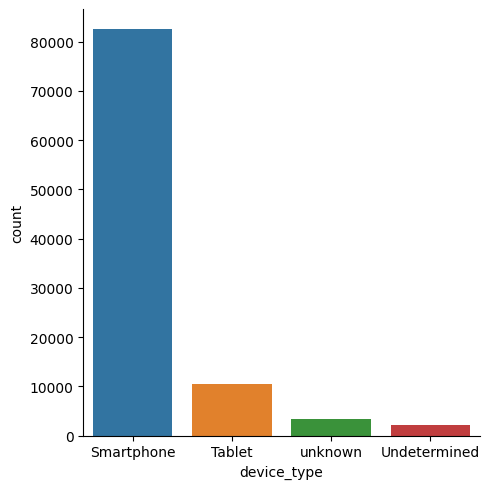

In [ ]:
sns.catplot(x='device_type', kind='count', data=good_with_extracted_df)

In [ ]:
good_with_extracted_df['device_os'].value_counts()

Android         55118
iOS             40981
Linux            2254
unknown            51
Undetermined        6
tvos                1
Name: device_os, dtype: int64

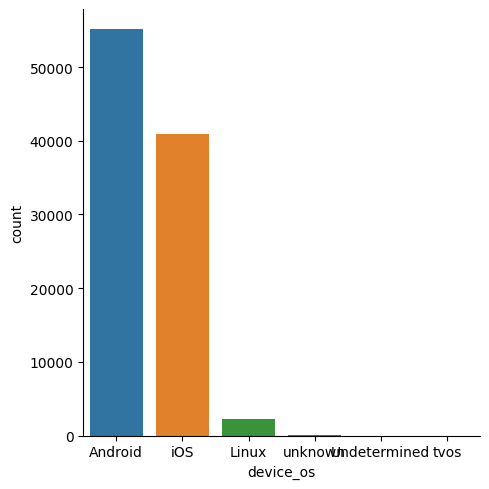

In [ ]:
sns.catplot(x='device_os', kind='count', data=good_with_extracted_df)

### 🔹 Only mobile data 📱

In [ ]:
mobile = df.mobile_advertising_id_maid_and_maid_type_array.notnull()
maid_df = df[mobile]
maid_df.shape

(212777, 118)

In [ ]:
mobile_good = good_with_extracted_df.mobile_advertising_id_maid_and_maid_type_array.notnull()
maid_good_df = good_with_extracted_df[mobile_good]
maid_good_df.shape


(182314, 121)

In [ ]:
unique_maid_good_df = maid_good_df.drop_duplicates(subset=['mobile_advertising_id_maid_and_maid_type_array'], keep='last')
unique_maid_good_df.shape

(176527, 121)

In [ ]:
#test record of duplicates drop
unique_maid_good_df[unique_maid_good_df['mobile_advertising_id_maid_and_maid_type_array']=='[12b9377cbe7e5c94e8a70d9d23929523d14afa954793130f8a3959c7b849aca8~Game console=xbox]']

,version_number,customer_unique_id,unparsed_name,unparsed_name_format,prefix,first_name,middle_name,last_name,generational_suffix,house_number,pre_directional,street_name,street_type,post_directional,unit_type,unit_number,street_address_line_1,street_address_line_2,city,state,zip_code,zip_4_code,delivery_point_barcode,zip11_code,phone_number_array,phone_number_one,phone_number_two,phone_number_three,email_address_array,email_address_one,email_address_two,email_address_three,mobile_advertising_id_maid_and_maid_type_array,mobile_advertising_id_maid_one,maid_device_type_one,mobile_advertising_id_maid_two,maid_device_type_two,mobile_advertising_id_maid_three,maid_device_type_three,ip_address_and_ip_address_time_stamp_array,ip_address_one,ip_address_time_stamp_one,ip_address_two,ip_address_time_stamp_two,ip_address_three,ip_address_time_stamp_three,latitude,longitude,unparsed_date_of_birth,birth_year,birth_month,birth_day,gender,transunion_external_id,number_of_persons_in_living_unit,number_of_children_in_living_unit,number_of_adults_in_living_unit,children_presence_of_child_0_18,children_age_0_3,children_age_0_3_score,children_age_0_3_gender,children_age_4_6,children_age_4_6_score,children_age_4_6_gender,children_age_7_9,children_age_7_9_score,children_age_7_9_gender,children_age_10_12,children_age_10_12_score,children_age_10_12_gender,children_age_13_15,children_age_13_15_score,children_age_13_15_gender,children_age_16_18,children_age_16_18_score,children_age_16_18_gender,household_composition,estimated_household_income_broad,estimated_household_income_narrow,property_realty_property_indicator,property_realty_home_land_value,estimated_current_home_value,property_realty_home_total_value,property_realty_median_home_value,dwelling_unit_size,dwelling_type,homeownercombined_homeowner_renter,property_realty_year_built_confidence,property_realty_year_built,length_of_residence,presence_of_credit_card,presence_of_premimum_credit_card,mail_responder,home_business,activity_date,census_2010_tract_and_block_group,core_based_statistical_areas_cbsa,core_based_statistical_area_type,census_rural_urban_county_size_code,median_family_household_income,gender_code,person_type_code,birth_date,age_code,occupation_code,occupation_group,maritalstatus,vndr_ethnic_code,ethnic_group_code,religion,country_of_origin,language_preference_code,education_model,business_owner,e1_segment_code,new_age,dob_fixed,age,maid,device_type,device_os
979671,1,hip_6a683c6946bbc03c32ba8f95e4f50b6b41a02032530c7ec08bfe4ffe3e1d39d3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[12b9377cbe7e5c94e8a70d9d23929523d14afa954793130f8a3959c7b849aca8~Game console=xbox],NaN,NaN,NaN,NaN,NaN,NaN,NaN,6a683c6946bbc03c32ba8f95e4f50b6b41a02032530c7ec08bfe4ffe3e1d39d3,2022-04-09T15:02:26.000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.00,1.00,5N,5N,1.00,NaN,5N,2.00,NaN,5N,2.00,NaN,5N,2.00,NaN,5N,1.00,NaN,5N,1.00,NaN,A,A,1.00,0.00,0.00,0.00,0.00,169836.00,D,A,T,0.00,NaN,0.00,NaN,NaN,NaN,NaN,20211101.00,210021.00,14260.00,A,2.00,47975.00,M,NaN,198501.00,E37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,147.00,37.00,1985-01-01,37,NaN,NaN,NaN


In [ ]:
maid_good_df[['customer_unique_id', 
              'mobile_advertising_id_maid_and_maid_type_array',
              'ip_address_one',
              'ip_address_time_stamp_one',]].agg(['nunique','count', 'size']).T

,nunique,count,size
customer_unique_id,182314,182314,182314
mobile_advertising_id_maid_and_maid_type_array,176527,182314,182314
ip_address_one,182314,182314,182314
ip_address_time_stamp_one,173742,182314,182314


### 🔹 Not mobile data 📺

In [ ]:
notmobile_df = df[~mobile]
notmobile_df.shape

(787223, 118)

In [ ]:
notmobile_good_df = good_with_extracted_df[~mobile_good]
notmobile_good_df.shape

(787223, 121)

In [ ]:
notmobile_good_df[['customer_unique_id', 
                   'mobile_advertising_id_maid_and_maid_type_array',
                   'ip_address_one',
                   'ip_address_time_stamp_one',]].agg(['nunique','count', 'size']).T

,nunique,count,size
customer_unique_id,787223,787223,787223
mobile_advertising_id_maid_and_maid_type_array,0,0,787223
ip_address_one,787223,787223,787223
ip_address_time_stamp_one,665599,787223,787223


## <span style="color:blue">NAs and misssings</span>


In [ ]:
df.customer_unique_id.describe()[['count','unique']]

count     1000000
unique    1000000
Name: customer_unique_id, dtype: object

In [ ]:
maid_summary = maid_df[['age_code', 
                        'gender_code',
                        'person_type_code',
                        'number_of_children_in_living_unit', 
                        'number_of_adults_in_living_unit', 
                        'number_of_persons_in_living_unit', 
                        'e1_segment_code',
                       ]].describe(include='all').T

In [ ]:
# Count total NaN at each column in a DataFrame: print(" \nCount total NaN at each column in a DataFrame : \n\n", details.isnull().sum())
maid_nas = pd.DataFrame(maid_df[['age_code', 
                                 'gender_code',
                                 'person_type_code',
                                 'number_of_children_in_living_unit', 
                                 'number_of_adults_in_living_unit', 
                                 'number_of_persons_in_living_unit', 
                                 'e1_segment_code',
                                ]].isnull().sum(),columns=['Num_NAs'])

In [ ]:
maid_fullsummary = pd.concat([maid_summary, maid_nas], axis=1)
maid_fullsummary. rename(columns = {'count':'Count'}, inplace = True)
maid_fullsummary = maid_fullsummary.assign(perc_count=maid_fullsummary.Count/(maid_fullsummary.Count+maid_fullsummary.Num_NAs))
maid_fullsummary = maid_fullsummary.assign(perc_NAs=maid_fullsummary.Num_NAs/(maid_fullsummary.Count+maid_fullsummary.Num_NAs))
maid_fullsummary

,Count,unique,top,freq,mean,std,min,25%,50%,75%,max,Num_NAs,perc_count,perc_NAs
age_code,76052,151,E62,1631,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136725,0.36,0.64
gender_code,91132,2,F,52175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121645,0.43,0.57
person_type_code,58789,4,P,42499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,153988,0.28,0.72
number_of_children_in_living_unit,87138.00,NaN,NaN,NaN,0.45,0.89,0.00,0.00,0.00,1.00,7.00,125639,0.41,0.59
number_of_adults_in_living_unit,87138.00,NaN,NaN,NaN,2.54,1.58,1.00,1.00,2.00,3.00,8.00,125639,0.41,0.59
number_of_persons_in_living_unit,87138.00,NaN,NaN,NaN,2.99,1.93,1.00,1.00,2.00,4.00,8.00,125639,0.41,0.59
e1_segment_code,114106.00,NaN,NaN,NaN,65.28,50.92,0.00,15.00,55.00,106.00,172.00,98671,0.54,0.46


**note: how can I optimise this by only sending a list of the variables I want to describe instead of writing them twice in 2 different paragraphs??**

In [ ]:
def summary_with_na(*columns: str):
    def pipe(df: pd.DataFrame):
        subset_df = df[list(columns)]
        summary = subset_df.describe(include="all").T
        nas = pd.DataFrame({
            "num_na": subset_df.isnull().sum()
        })
        summary = pd.concat([summary, nas], axis="columns")
        summary.rename(columns = {'count':'non_null'}, inplace = True)
        summary = summary.assign(perc_count=summary.non_null/(summary.non_null+summary.num_na))
        summary = summary.assign(perc_nas=summary.num_na/(summary.non_null+summary.num_na))
        return summary
    return pipe

In [ ]:
df.pipe(summary_with_na('age_code', 'age', 
                        'gender_code',
                        'person_type_code',
                        'number_of_children_in_living_unit', 
                        'number_of_adults_in_living_unit', 
                        'number_of_persons_in_living_unit', 
                        'e1_segment_code'))

,non_null,unique,top,freq,mean,std,min,25%,50%,75%,max,num_na,perc_count,perc_nas
age_code,83213,151,E62,1762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,916787,0.08,0.92
age,79459.00,NaN,NaN,NaN,52.43,15.97,17.00,40.00,53.00,65.00,99.00,920541,0.08,0.92
gender_code,99850,2,F,57109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900150,0.10,0.90
person_type_code,64409,4,P,46560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,935591,0.06,0.94
number_of_children_in_living_unit,96047.00,NaN,NaN,NaN,0.45,0.89,0.00,0.00,0.00,1.00,7.00,903953,0.10,0.90
number_of_adults_in_living_unit,96047.00,NaN,NaN,NaN,2.54,1.58,1.00,1.00,2.00,3.00,8.00,903953,0.10,0.90
number_of_persons_in_living_unit,96047.00,NaN,NaN,NaN,2.99,1.93,1.00,1.00,2.00,4.00,8.00,903953,0.10,0.90
e1_segment_code,125883.00,NaN,NaN,NaN,64.79,50.86,0.00,15.00,55.00,106.00,172.00,874117,0.13,0.87


In [ ]:
maid_good_df.pipe(summary_with_na('age_code','age',
                                  'gender_code',
                                  'person_type_code',
                                  'number_of_children_in_living_unit', 
                                  'number_of_adults_in_living_unit', 
                                  'number_of_persons_in_living_unit', 
                                  'e1_segment_code'))

,non_null,unique,top,freq,mean,std,min,25%,50%,75%,max,num_na,perc_count,perc_nas
age_code,64407,151,E62,1398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117907,0.35,0.65
age,61563.00,NaN,NaN,NaN,52.61,15.95,17.00,40.00,53.00,65.00,99.00,120751,0.34,0.66
gender_code,77076,2,F,43982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105238,0.42,0.58
person_type_code,49729,4,P,35975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132585,0.27,0.73
number_of_children_in_living_unit,73621.00,NaN,NaN,NaN,0.45,0.89,0.00,0.00,0.00,1.00,7.00,108693,0.40,0.60
number_of_adults_in_living_unit,73621.00,NaN,NaN,NaN,2.54,1.58,1.00,1.00,2.00,3.00,8.00,108693,0.40,0.60
number_of_persons_in_living_unit,73621.00,NaN,NaN,NaN,2.99,1.93,1.00,1.00,2.00,4.00,8.00,108693,0.40,0.60
e1_segment_code,96375.00,NaN,NaN,NaN,64.80,50.78,0.00,15.00,55.00,105.00,172.00,85939,0.53,0.47


In [ ]:
notmobile_good_df.pipe(summary_with_na('age_code', 'age',
                                       'gender_code',
                                       'person_type_code',
                                       'number_of_children_in_living_unit', 
                                       'number_of_adults_in_living_unit', 
                                       'number_of_persons_in_living_unit', 
                                       'e1_segment_code'))

,non_null,unique,top,freq,mean,std,min,25%,50%,75%,max,num_na,perc_count,perc_nas
age_code,7161,142,E41,161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,780062,0.01,0.99
age,6786.00,NaN,NaN,NaN,51.27,16.15,17.00,39.00,51.00,63.00,98.00,780437,0.01,0.99
gender_code,8718,2,F,4934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,778505,0.01,0.99
person_type_code,5620,4,P,4061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,781603,0.01,0.99
number_of_children_in_living_unit,8909.00,NaN,NaN,NaN,0.45,0.90,0.00,0.00,0.00,1.00,6.00,778314,0.01,0.99
number_of_adults_in_living_unit,8909.00,NaN,NaN,NaN,2.55,1.57,1.00,1.00,2.00,3.00,8.00,778314,0.01,0.99
number_of_persons_in_living_unit,8909.00,NaN,NaN,NaN,3.00,1.93,1.00,1.00,2.00,4.00,8.00,778314,0.01,0.99
e1_segment_code,11777.00,NaN,NaN,NaN,60.11,50.00,0.00,13.00,50.00,99.00,172.00,775446,0.01,0.99


In [ ]:
unique_maid_good_df.pipe(summary_with_na('age_code', 'age',
                                         'gender_code',
                                         'person_type_code',
                                         'number_of_children_in_living_unit', 
                                         'number_of_adults_in_living_unit', 
                                         'number_of_persons_in_living_unit', 
                                         'e1_segment_code'))

,non_null,unique,top,freq,mean,std,min,25%,50%,75%,max,num_na,perc_count,perc_nas
age_code,64122,151,E62,1386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112405,0.36,0.64
age,61290.00,NaN,NaN,NaN,52.62,15.95,17.00,40.00,53.00,65.00,99.00,115237,0.35,0.65
gender_code,76741,2,F,43791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99786,0.43,0.57
person_type_code,49498,4,P,35816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127029,0.28,0.72
number_of_children_in_living_unit,73273.00,NaN,NaN,NaN,0.45,0.89,0.00,0.00,0.00,1.00,7.00,103254,0.42,0.58
number_of_adults_in_living_unit,73273.00,NaN,NaN,NaN,2.54,1.58,1.00,1.00,2.00,3.00,8.00,103254,0.42,0.58
number_of_persons_in_living_unit,73273.00,NaN,NaN,NaN,2.99,1.93,1.00,1.00,2.00,4.00,8.00,103254,0.42,0.58
e1_segment_code,95925.00,NaN,NaN,NaN,64.82,50.77,0.00,15.00,55.00,105.00,172.00,80602,0.54,0.46


In [ ]:
#help(pd.concat)

## <span style="color:blue">Time Stamp</span>
On original datafarme (df)
- Min value: 01-04-2022 4am
- Max value: 01-05-2022 4am

In [ ]:
df[['ip_address_time_stamp_one',]].agg(['nunique','count', 'size']).T

,nunique,count,size
ip_address_time_stamp_one,807382,1000000,1000000


In [ ]:
df[['ip_address_time_stamp_one',]].describe(datetime_is_numeric=True).T

,count,mean,min,25%,50%,75%,max
ip_address_time_stamp_one,1000000,2022-04-15 15:40:45.915163648+00:00,2022-04-01 04:00:00+00:00,2022-04-07 18:14:58.750000128+00:00,2022-04-15 14:15:00.500000+00:00,2022-04-23 13:22:04.750000128+00:00,2022-05-01 03:59:57+00:00


In [ ]:
df[['ip_address_time_stamp_one',]].dtypes

ip_address_time_stamp_one    object
dtype: object

In [ ]:
df['ip_address_time_stamp_one'] = pd.to_datetime(df['ip_address_time_stamp_one'])

## <span style="color:blue">Data frames created</span>

In [ ]:
print(df.shape)
print(bad_df.shape)
print(good_df.shape)
print(good_with_extracted_df.shape)
print(maid_df.shape)
print(maid_good_df.shape)
print(notmobile_good_df.shape)

(1000000, 118)
(30463, 118)
(969537, 118)
(969537, 121)
(212777, 118)
(182314, 121)
(787223, 121)


## <span style="color:blue">Demographic information</span>
All demographic information was plotted using the original df data set

### ✅️ Gender

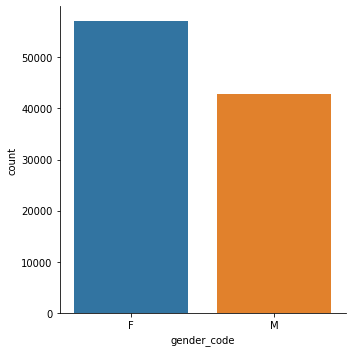

In [ ]:
sns.catplot(x='gender_code', kind='count', data=df)

### ✅️ Person Type

- P: Primary Decision Maker 
- Y: Young Adult 
- E: Elderly Parent
- D: Deceased
- O: Other 
- U: Unknown 

**Question:** What is the definition of a Primary Decision Maker?
    

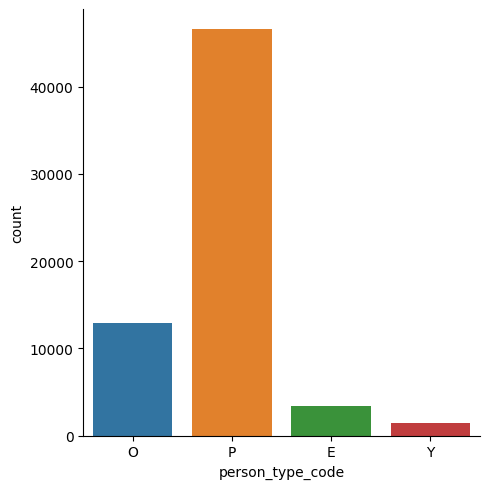

In [ ]:
sns.catplot(x='person_type_code', kind='count', data=df)

### ✅️ Age

The new age variables were created on the original df data set, if the notebook is ran again then the data sets created before this will need to be run again to update all data sets created

In [ ]:
df.pipe(summary_with_na('age_code', ))

,non_null,unique,top,freq,num_na,perc_count,perc_nas
age_code,83213,151,E62,1762,916787,0.08,0.92


In [ ]:
print(df.birth_date.head())

0         NaN
1   196809.00
2   199205.00
3   198609.00
4         NaN
Name: birth_date, dtype: float64


In [ ]:
df.age_code.unique()

array([nan, 'E53', 'E30', 'E35', 'E80', 'E38', 'E57', 'E65', 'E74', 'E34',
       'E55', 'E22', 'E71', 'E37', 'E54', 'E66', 'E26', 'E82', 'E40',
       'I54', 'E50', 'I37', 'E41', 'E67', 'E46', 'E43', 'E64', 'E83',
       'E39', 'E48', 'E76', 'E42', 'E45', 'E49', 'I41', 'E36', 'E23',
       'E44', 'E61', 'E70', 'E52', 'E33', 'E72', 'E58', 'E51', 'E73',
       'E21', 'I30', 'E47', 'E68', 'E19', 'E62', 'E27', 'I43', 'E25',
       'E69', 'E56', 'E29', 'E32', 'E24', 'E88', 'E60', 'E91', 'I23',
       'E79', 'E59', 'E90', 'E28', 'E78', 'E93', 'E75', 'E63', 'I53',
       'I35', 'E86', 'E95', 'E20', 'I58', 'I38', 'I21', 'I78', 'E81',
       'I20', 'I40', 'E85', 'I24', 'E77', 'E31', 'I29', 'I19', 'I22',
       'I47', 'I32', 'I45', 'I55', 'I34', 'I56', 'E87', 'I67', 'I82',
       'I36', 'I27', 'I33', 'E89', 'E92', 'I52', 'I25', 'I44', 'E84',
       'I64', 'I28', 'I65', 'I26', 'I49', 'E94', 'I76', 'I46', 'I66',
       'I70', 'I87', 'I39', 'I31', 'I74', 'I68', 'I42', 'I50', 'I73',
       'I71', '

In [ ]:
pd.set_option('display.max_rows', None)
age_counts = df[['customer_unique_id','age_code']].groupby(['age_code']).count()
#age_counts.to_csv('age_code_totals.csv')

In [ ]:
df['age_code'].str.lstrip('EI').convert_dtypes().head()

0    <NA>
1      53
2      30
3      35
4    <NA>
Name: age_code, dtype: string

In [ ]:
df['age_code'].str[1:].head()

0    NaN
1     53
2     30
3     35
4    NaN
Name: age_code, dtype: object

In [ ]:
df['new_age']= df['age_code'].str.lstrip('EI').convert_dtypes()

In [ ]:
df['new_age'] = pd.to_numeric(df['new_age'])                                              

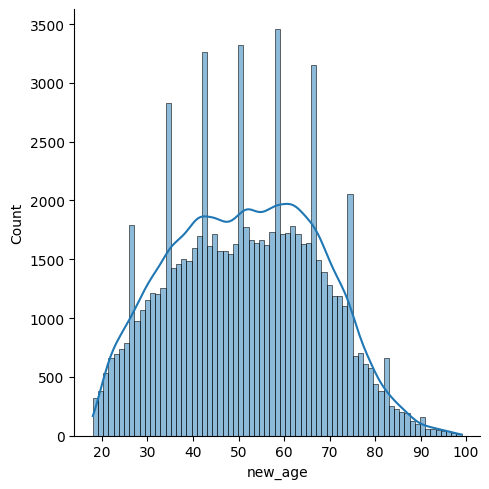

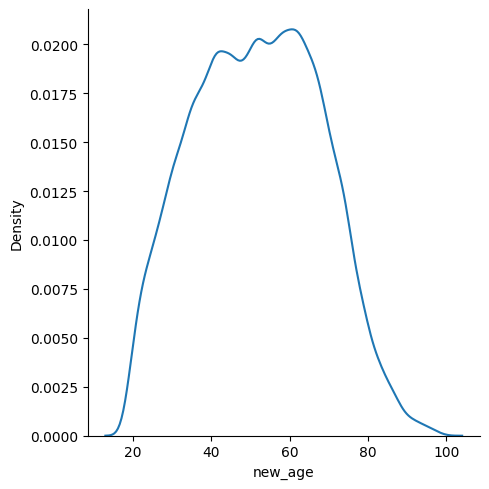

In [ ]:
sns.displot(df, x='new_age', kde=True, rug=False)
sns.displot(df, x='new_age', kind='kde')

In [ ]:
# from IPython.display import display

# %matplotlib inline

# g1 = sns.displot(df, x='new_age', kde=True, rug=False)
# g2 = sns.displot(df, x='new_age', kind='kde')

# display(g1)
# display(g2)

In [ ]:
#help(sns.kdeplot)
# fig, axs = plt.subplots(ncols=2)
# sns.histplot(df, x='new_age', ax=axs[0])
# sns.kdeplot(data=df, x='new_age', ax=axs[1])

**Questions:** 
- why do I have some spikes on some of the ages? Python is doing this, not sure why
- what does the E and I at the beginning of the original variable mean? is it relevant? E: exact age, I: Inferred age
- Why isn't there an age variable as per the data dictionary they provided?

**Action:**
- Create a new variable from birth_date column

In [ ]:
#fixed_type = df['birth_date'].astype(pd.Int64Dtype())
# len(fixed_type[(fixed_type % 100) == 0])

# np.where(
#     fixed_type[(fixed_type % 100) == 0], 
#     pd.to_datetime(fixed_type // 100, format='%Y'), 
#     pd.to_datetime(fixed_type, format='%Y%m', errors="ignore")
# ).head()

#df['birth_date'].iloc[156]

In [ ]:
#pd.to_datetime(df['birth_date'].astype(pd.Int64Dtype()), format='%Y%m').head(20)

In [ ]:
#pd.to_datetime(df['birth_date'].astype('str').str[:6],format='%Y%m', errors='ignore').head(20)

In [ ]:
def extract_date(birth_date: int):
    if pd.isna(birth_date):
        return None
    birth_date_string = str(birth_date).strip()
    try:
        if len(birth_date_string) == 4:
            return pd.to_datetime(birth_date_string, format='%Y')
        elif (birth_date % 100) == 0:
            return pd.to_datetime(birth_date_string[:-2], format='%Y')
        else:
            return pd.to_datetime(birth_date_string, format='%Y%m')
    except Exception as e:
        raise RuntimeError(f"Could not parse {birth_date}") from e

df['dob_fixed'] = df['birth_date'].astype(pd.Int64Dtype()).apply(extract_date)
df['dob_fixed'].head()

0          NaT
1   1968-09-01
2   1992-05-01
3   1986-09-01
4          NaT
Name: dob_fixed, dtype: datetime64[ns]

In [ ]:
#from datetime import date    
#today = date.today().isoformat()
now = pd.Timestamp('now')
now

Timestamp('2022-07-25 10:47:51.176581')

In [ ]:
df['age'] = (now - df['dob_fixed']).astype('<m8[Y]').astype(pd.Int64Dtype()) #what is this doing: '<m8[Y]'?
df['age'].head()

0    <NA>
1      53
2      30
3      35
4    <NA>
Name: age, dtype: Int64

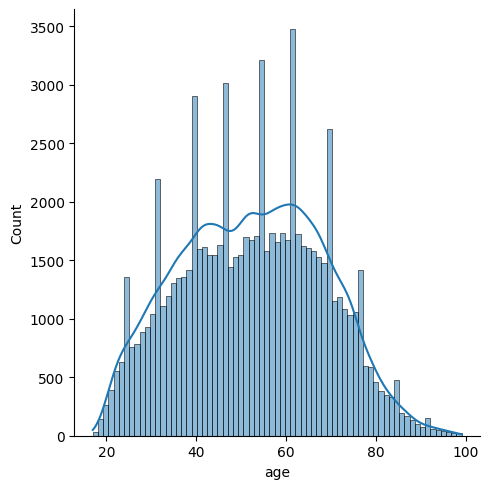

In [ ]:
sns.displot(df, x='age', kde=True)

### ✅️ Information about household composition

- number of people living in a home

In [ ]:
df[['number_of_children_in_living_unit', 
    'number_of_adults_in_living_unit', 
    'number_of_persons_in_living_unit', 
   ]].describe().T

,count,mean,std,min,25%,50%,75%,max
number_of_children_in_living_unit,96047.00,0.45,0.89,0.00,0.00,0.00,1.00,7.00
number_of_adults_in_living_unit,96047.00,2.54,1.58,1.00,1.00,2.00,3.00,8.00
number_of_persons_in_living_unit,96047.00,2.99,1.93,1.00,1.00,2.00,4.00,8.00


In [ ]:
df[['household_composition', 'homeownercombined_homeowner_renter',
   ]].describe(include='all').T

,count,unique,top,freq
household_composition,94259,10,G,18628
homeownercombined_homeowner_renter,87877,6,H,66103


- household composition, where:
  - A: 1 adult female
  - B: 1 adult male
  - C: 1 adult female and 1 adult male
  - D: 1 adult female, 1 adult male and children
  - E: 1 adult female and children present
  - F: 1 adult male and children present
  - G: 2 or more adult males
  - H: 2 or more adult females
  - I: 2 or more adult males and children
  - J: 2 or more adult females and children
  - U: Unknown 
<br />
<br />
- Homeowner information indicates the likelihood of a consumer owning a home. Where:  - 
  - H: Homeowner
  - 09: Extremely Likely
  - 08: Highly Likely
  - 07: Likely
  - R: Renter
  - T: Probable Renter
  - U: Unknown

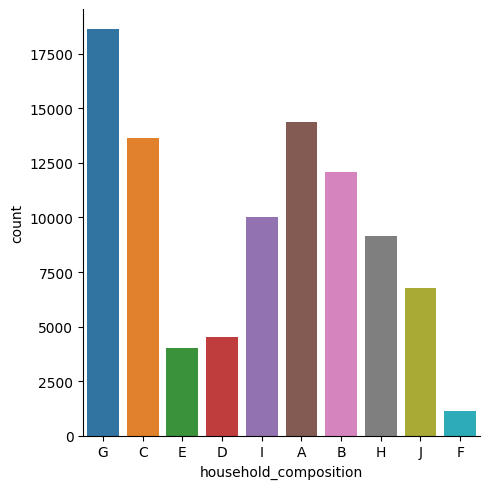

In [ ]:
sns.catplot(x='household_composition', kind='count', data=df)

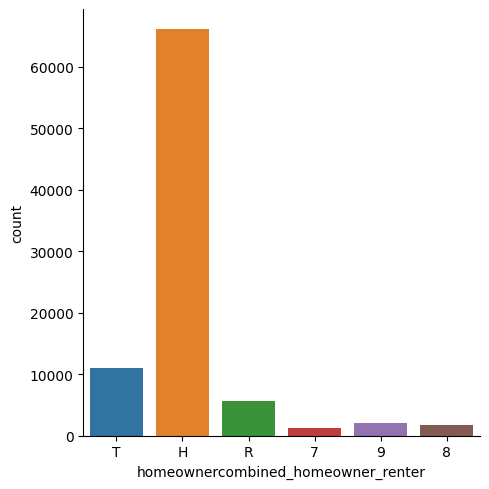

In [ ]:
sns.catplot(x='homeownercombined_homeowner_renter', kind='count', data=df)

### ✅️ Household income, property values and length of residence

In [ ]:
#'estimated_household_income_broad', categorical variable

df[['estimated_household_income_narrow', 
    'estimated_current_home_value', 
    'length_of_residence',
    'median_family_household_income',
   ]].describe().T

,count,mean,std,min,25%,50%,75%,max
estimated_household_income_narrow,96047.00,86.04,63.73,0.00,40.00,70.00,120.00,250.00
estimated_current_home_value,96047.00,309922.35,338921.00,0.00,92274.00,248606.00,422574.50,9999999.00
length_of_residence,96047.00,12.48,11.88,0.00,3.00,9.00,20.00,72.00
median_family_household_income,96047.00,81623.69,36752.81,0.00,56485.00,74436.00,99467.00,412176.00


### ✅️ Education

For Education_model variable:
- 11: HS Diploma -Extremely Likely 
- 12: Some College -Extremely Likely 
- 13: Bach Degree -Extremely Likely 
- 14: Grad Degree -Extremely Likely 
- 15: Less than HS Diploma -Ex Like 
- 51: HS Diploma -Likely 
- 52: Some College -Likely 
- 53: Bach Degree -Likely 
- 54: Grad Degree -Likely 
- 55: Less than HS Diploma -Likely 
- UU: 	Unknown

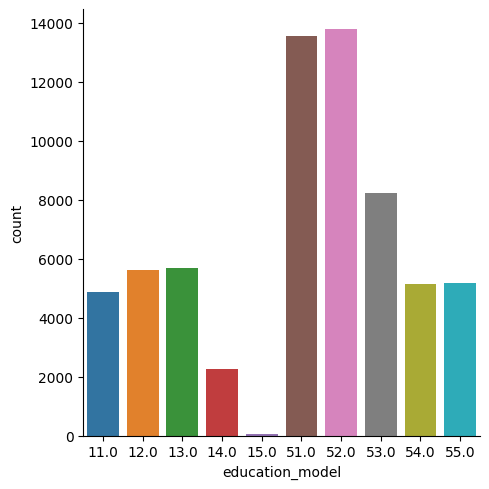

In [ ]:
sns.catplot(x='education_model', kind='count', data=df)

In [ ]:
df['education_model'] = df['education_model'].astype('category')
df[['business_owner',
    'education_model', 
   ]].describe(include='all').T

,count,unique,top,freq
business_owner,2116,1,Y,2116
education_model,64409.00,10.00,52.00,13780.00


## <span style="color:blue">Segment information</span>

**Questions:**
 - Segment labels: what do they mean?
 - Segment 0 is an actual category or is it a lack of segment?

In [ ]:
np.sort(df.e1_segment_code.unique())

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [ ]:
df[['customer_unique_id','e1_segment_code']].groupby(['e1_segment_code']).count()

,customer_unique_id
e1_segment_code,
0.00,1471
1.00,966
2.00,1559
3.00,1694
4.00,944
5.00,486
6.00,4340
7.00,2003
8.00,3990


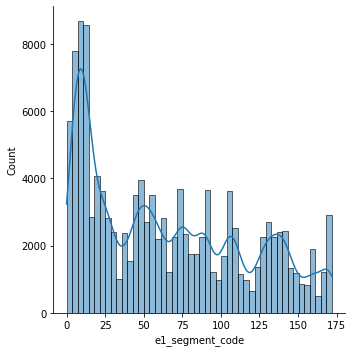

In [ ]:
sns.displot(df, x='e1_segment_code', kde=True, rug=False)

<AxesSubplot:xlabel='gender_code', ylabel='median_family_household_income'>

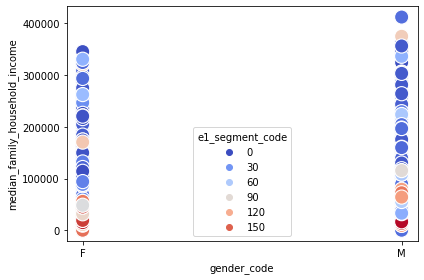

In [ ]:
sns.scatterplot(data=df, x="gender_code", y="median_family_household_income", hue="e1_segment_code", palette="coolwarm", s=200) #spectral, Blues

<AxesSubplot:xlabel='person_type_code', ylabel='median_family_household_income'>

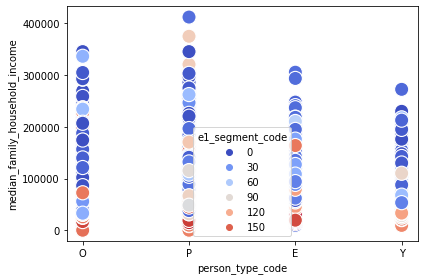

In [ ]:
sns.scatterplot(data=df, x="person_type_code", y="median_family_household_income", hue="e1_segment_code", palette="coolwarm", s=200) #spectral, Blues

<AxesSubplot:xlabel='household_composition', ylabel='median_family_household_income'>

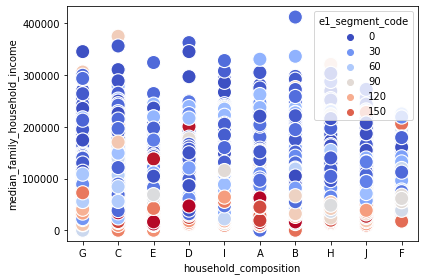

In [ ]:
sns.scatterplot(data=df, x="household_composition", y="median_family_household_income", hue="e1_segment_code", palette="coolwarm", s=200) #spectral, Blues

<AxesSubplot:xlabel='age', ylabel='median_family_household_income'>

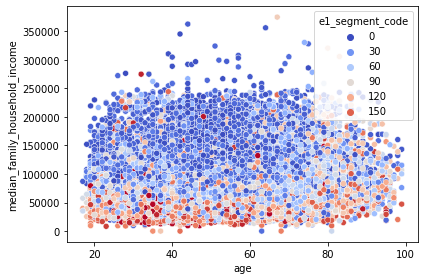

In [ ]:
sns.scatterplot(data=df, x="age", y="median_family_household_income", hue="e1_segment_code", palette="coolwarm")

<AxesSubplot:xlabel='new_age', ylabel='median_family_household_income'>

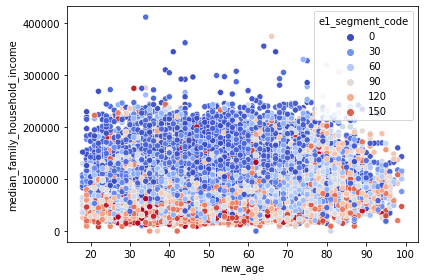

In [ ]:
sns.scatterplot(data=maid_df, x="new_age", y="median_family_household_income", hue="e1_segment_code", palette="coolwarm")

<AxesSubplot:xlabel='number_of_persons_in_living_unit', ylabel='median_family_household_income'>

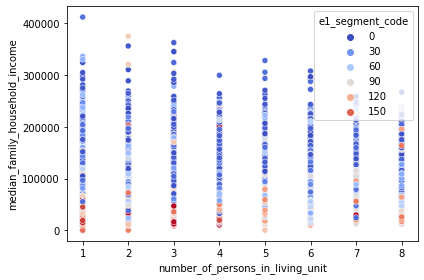

In [ ]:
sns.scatterplot(data=df, x="number_of_persons_in_living_unit", y="median_family_household_income", hue="e1_segment_code", palette="coolwarm")

<AxesSubplot:xlabel='number_of_children_in_living_unit', ylabel='median_family_household_income'>

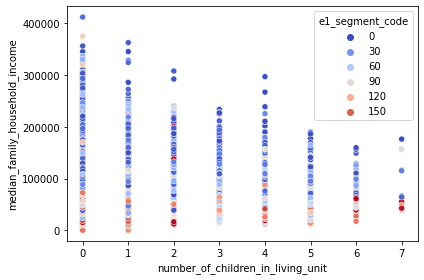

In [ ]:
sns.scatterplot(data=df, x="number_of_children_in_living_unit", y="median_family_household_income", hue="e1_segment_code", palette="coolwarm")

<AxesSubplot:xlabel='education_model', ylabel='median_family_household_income'>

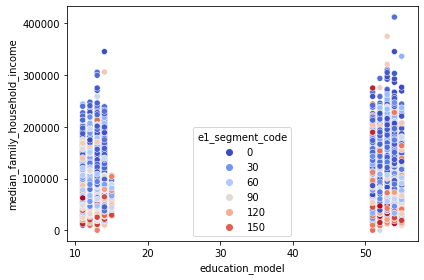

In [ ]:
sns.scatterplot(data=df, x="education_model", y="median_family_household_income", hue="e1_segment_code", palette="coolwarm")

**Questions:** 
- Do they have a higher level segmentation? 
- Can they provide more numerical variables to create a new segmentation? 
- Can they tell us which variables they used for the segmentation?

**Action:**
- How can we reduce the number of segments?
- Try: Hierarchical segmentation - dendrogram, compare results with current segmentation. 
- Do I group the segments or make a new one and compare?? ... mmmhh ... put your thinking cap on!